In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Configs
plt.rcParams["figure.figsize"] = (21, 9)

In [3]:
def prices_files(round: int, start: int, end: int):
    return [f"../data/island-data-bottle-round-{round}/prices_round_{round}_day_{i}.csv" for i in range(start, end+1)]
def trades_files(round: int, start: int, end: int):
    return [f"../data/island-data-bottle-round-{round}/trades_round_{round}_day_{i}_nn.csv" for i in range(start, end+1)]

rd_1_price_files, rd_1_trade_files = prices_files(1, -2, -2), trades_files(1, -2, -2)
rd_2_price_files, rd_2_trade_files = prices_files(2, -1, 1), trades_files(2, -1, 1)

all_price_files = rd_1_price_files + rd_2_price_files
all_trade_files = rd_1_trade_files + rd_2_trade_files

In [4]:
def get_prices_df(product):
    prices_df = pd.concat((pd.read_csv(filename, sep=";", usecols=lambda x: x not in ["day", "profit_and_loss"], index_col=["timestamp"]) for filename in all_price_files), axis="index").query(f"product == '{product}'").reset_index(drop=True)
    prices_df.insert(0, "timestamp", prices_df.index * 100)
    prices_df.set_index("timestamp", inplace=True)
    return prices_df

def get_trades_df(symbol):
    trades_df = pd.concat((pd.read_csv(filename, sep=";", usecols=lambda x : x not in ["buyer", "seller", "currency"], index_col=["timestamp"]) for filename in all_trade_files)).query(f"symbol == '{symbol}'").reset_index(drop=True)
    trades_df.insert(0, "timestamp", trades_df.index)
    trades_df.set_index("timestamp", inplace=True)
    return trades_df

In [5]:
def time_at(day_in_df: int):
    return day_in_df * 1000000

In [6]:
banana_prices_df = get_prices_df("BANANAS").fillna(0)
banana_prices_df.insert(7, "bid_volume", banana_prices_df["bid_volume_1"] + banana_prices_df["bid_volume_2"] + banana_prices_df["bid_volume_3"])
banana_prices_df.insert(14, "ask_volume", - banana_prices_df["ask_volume_1"] - banana_prices_df["ask_volume_2"] - banana_prices_df["ask_volume_3"])
banana_prices_df["diff_volume"] = banana_prices_df["bid_volume"] + banana_prices_df["ask_volume"]
banana_prices_df

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,bid_volume,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,ask_volume,mid_price,diff_volume
timestamp,,,,,,,,,,,,,,,,,
0,BANANAS,4997,26,0.0,0.0,0.0,0.0,26.0,5003,26,0.0,0.0,0.0,0.0,-26.0,5000.0,0.0
100,BANANAS,4997,20,0.0,0.0,0.0,0.0,20.0,4998,1,5004.0,20.0,0.0,0.0,-21.0,4997.5,-1.0
200,BANANAS,4997,31,0.0,0.0,0.0,0.0,31.0,5004,31,0.0,0.0,0.0,0.0,-31.0,5000.5,0.0
300,BANANAS,4997,27,0.0,0.0,0.0,0.0,27.0,5004,27,0.0,0.0,0.0,0.0,-27.0,5000.5,0.0
400,BANANAS,4997,20,0.0,0.0,0.0,0.0,20.0,5002,9,5004.0,20.0,0.0,0.0,-29.0,4999.5,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999500,BANANAS,4821,25,0.0,0.0,0.0,0.0,25.0,4822,1,4827.0,25.0,0.0,0.0,-26.0,4821.5,-1.0
3999600,BANANAS,4820,24,0.0,0.0,0.0,0.0,24.0,4823,3,4827.0,24.0,0.0,0.0,-27.0,4821.5,-3.0
3999700,BANANAS,4820,30,0.0,0.0,0.0,0.0,30.0,4821,1,4825.0,7.0,4827.0,30.0,-38.0,4820.5,-8.0


In [7]:
banana_trades_df = get_trades_df("BANANAS")
banana_trades_df = banana_trades_df[banana_trades_df['price'] != 0]
banana_trades_df

,symbol,price,quantity
timestamp,,,
0,BANANAS,5003.0,1
1,BANANAS,4998.0,1
2,BANANAS,5000.0,4
3,BANANAS,5000.0,3
4,BANANAS,4997.0,10
...,...,...,...
11490,BANANAS,4822.0,1
11491,BANANAS,4821.0,1
11492,BANANAS,4822.0,1


<Axes: xlabel='timestamp'>

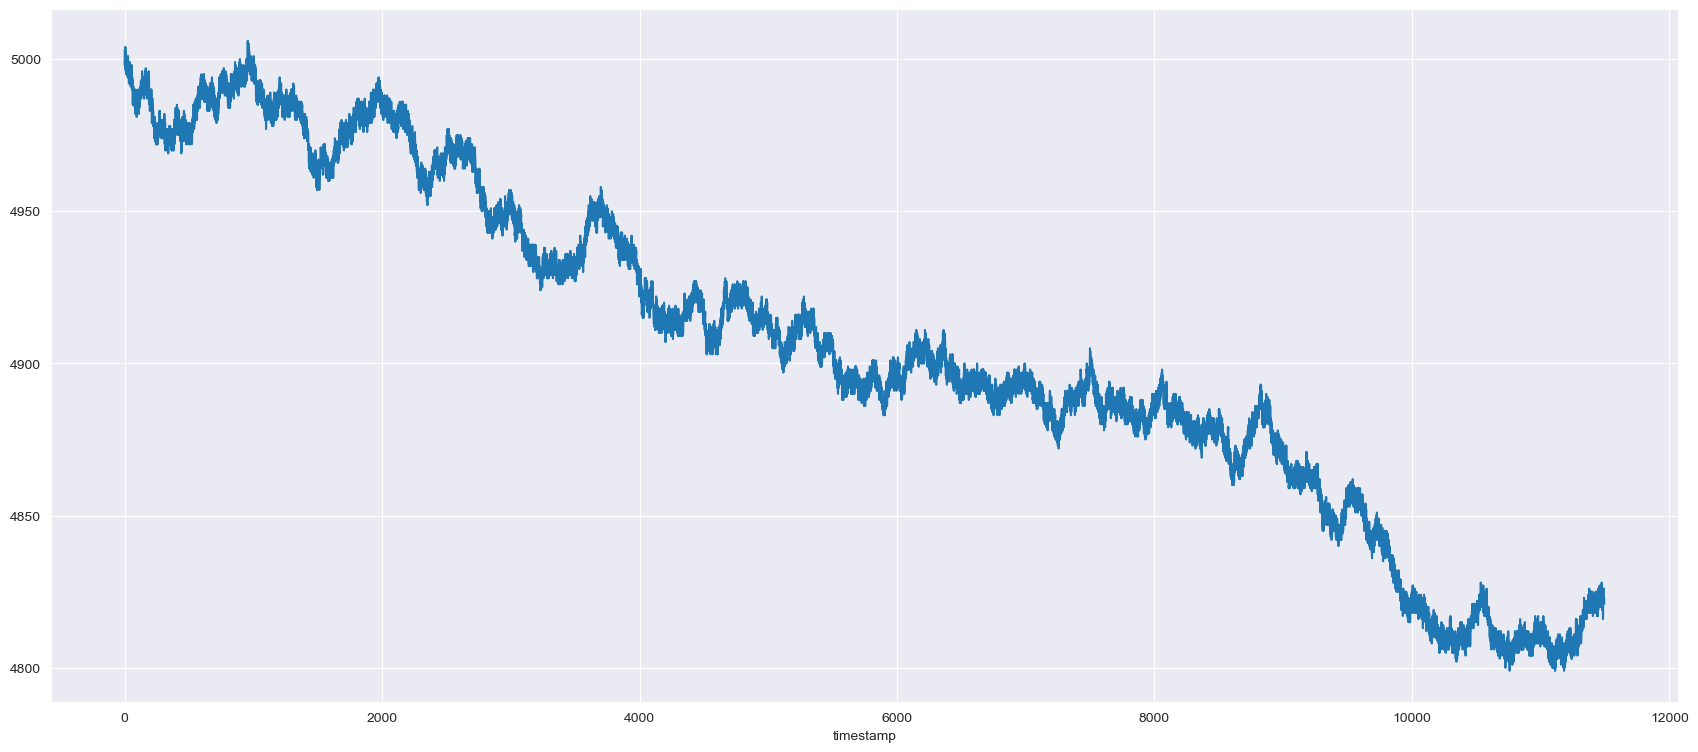

In [8]:
banana_trades_df["price"].plot()

<Axes: xlabel='timestamp'>

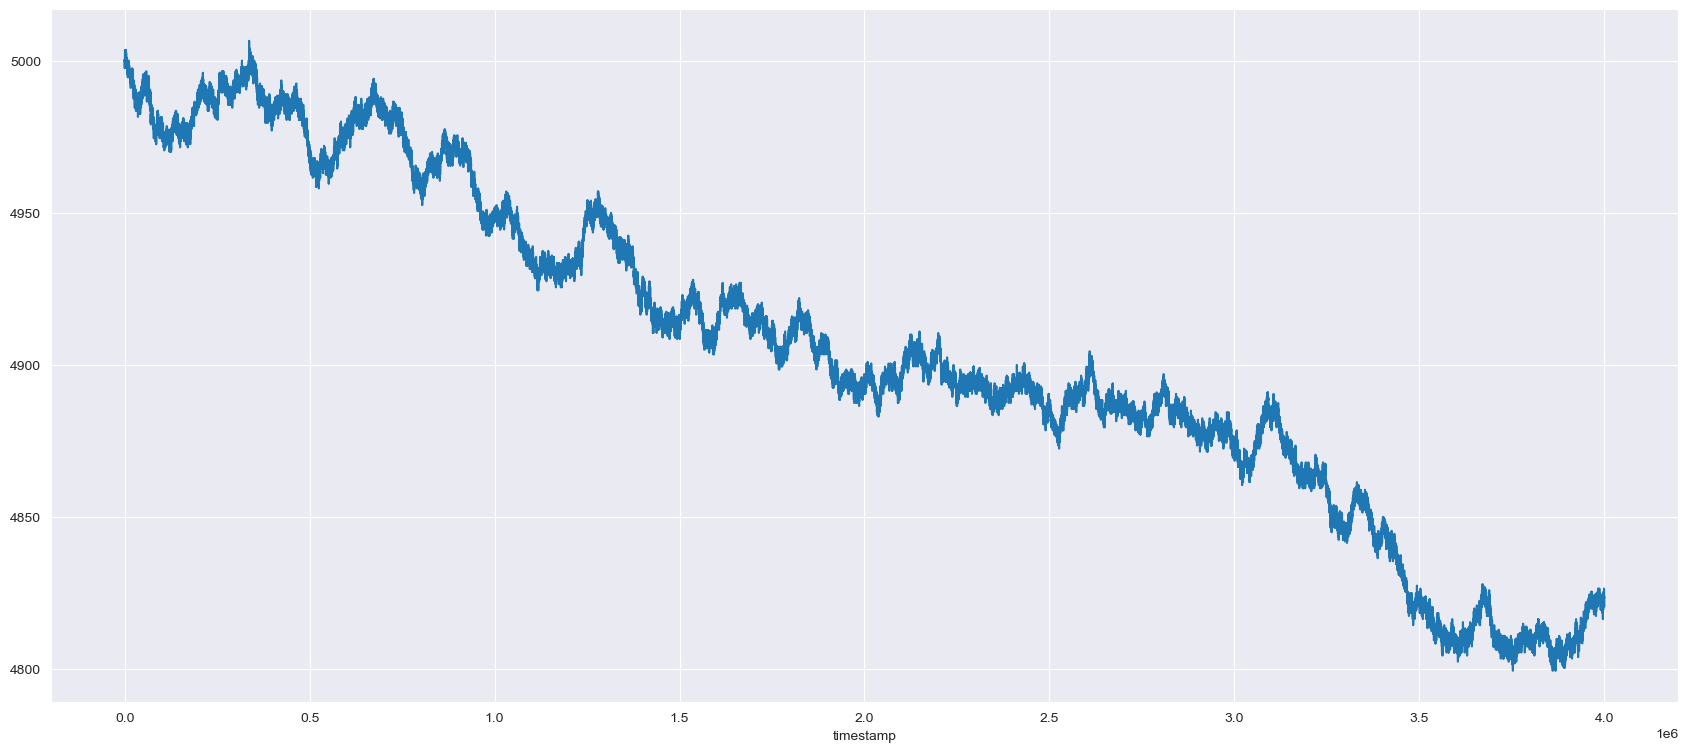

In [9]:
banana_prices_df["mid_price"].plot()

<Axes: xlabel='timestamp'>

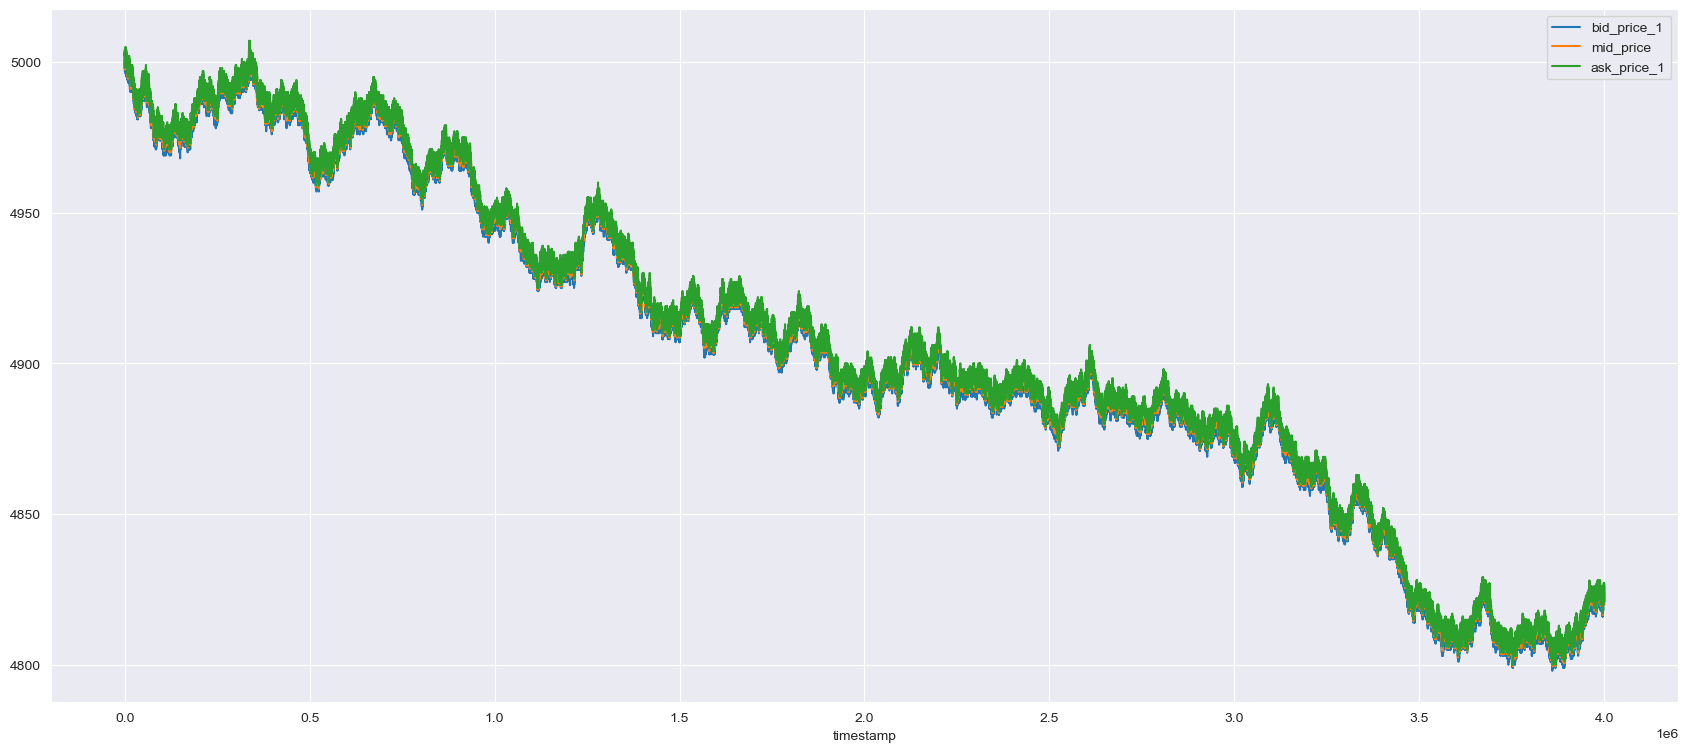

In [10]:
banana_prices_df[["bid_price_1", "mid_price", "ask_price_1"]].plot()

<Axes: xlabel='timestamp'>

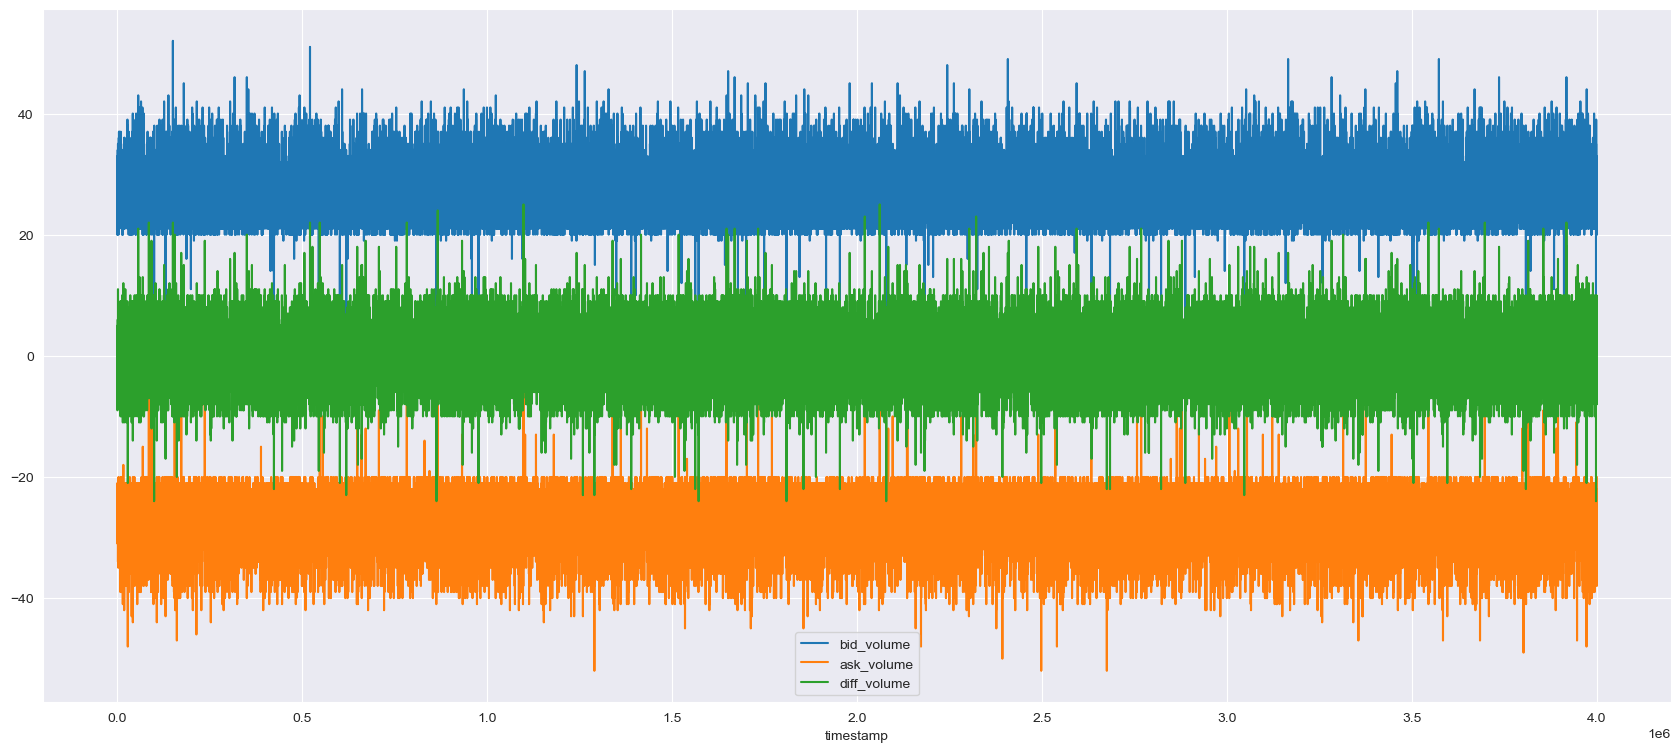

In [11]:
volumes = banana_prices_df[["bid_volume", "ask_volume", "diff_volume"]].copy()
volumes.iloc[0 : time_at(2)].plot()

In [12]:
volumes.describe()

,bid_volume,ask_volume,diff_volume
count,40000.0000,40000.000000,40000.000000
mean,27.1128,-27.108225,0.004575
std,4.2556,4.250137,4.122854
min,3.0000,-52.000000,-24.000000
25%,24.0000,-30.000000,-1.000000
50%,27.0000,-27.000000,0.000000
75%,30.0000,-24.000000,1.000000
max,52.0000,-4.000000,25.000000


In [13]:
volumes.shape

(40000, 3)

array([[<Axes: xlabel='timestamp'>],
       [<Axes: xlabel='timestamp'>]], dtype=object)

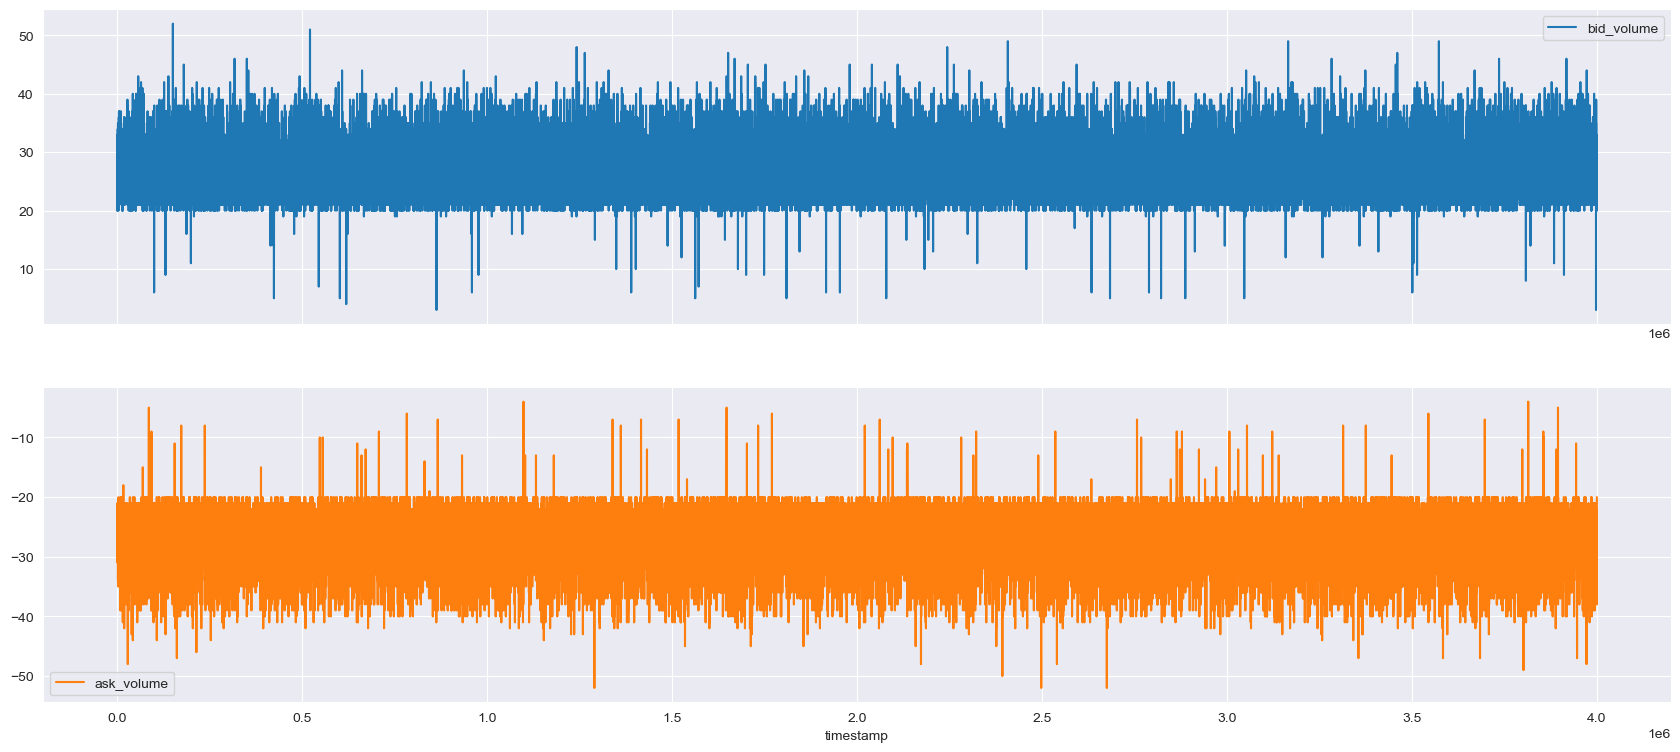

In [14]:
banana_prices_df[["bid_volume", "ask_volume"]].plot(subplots=True, layout=(2, 1))

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

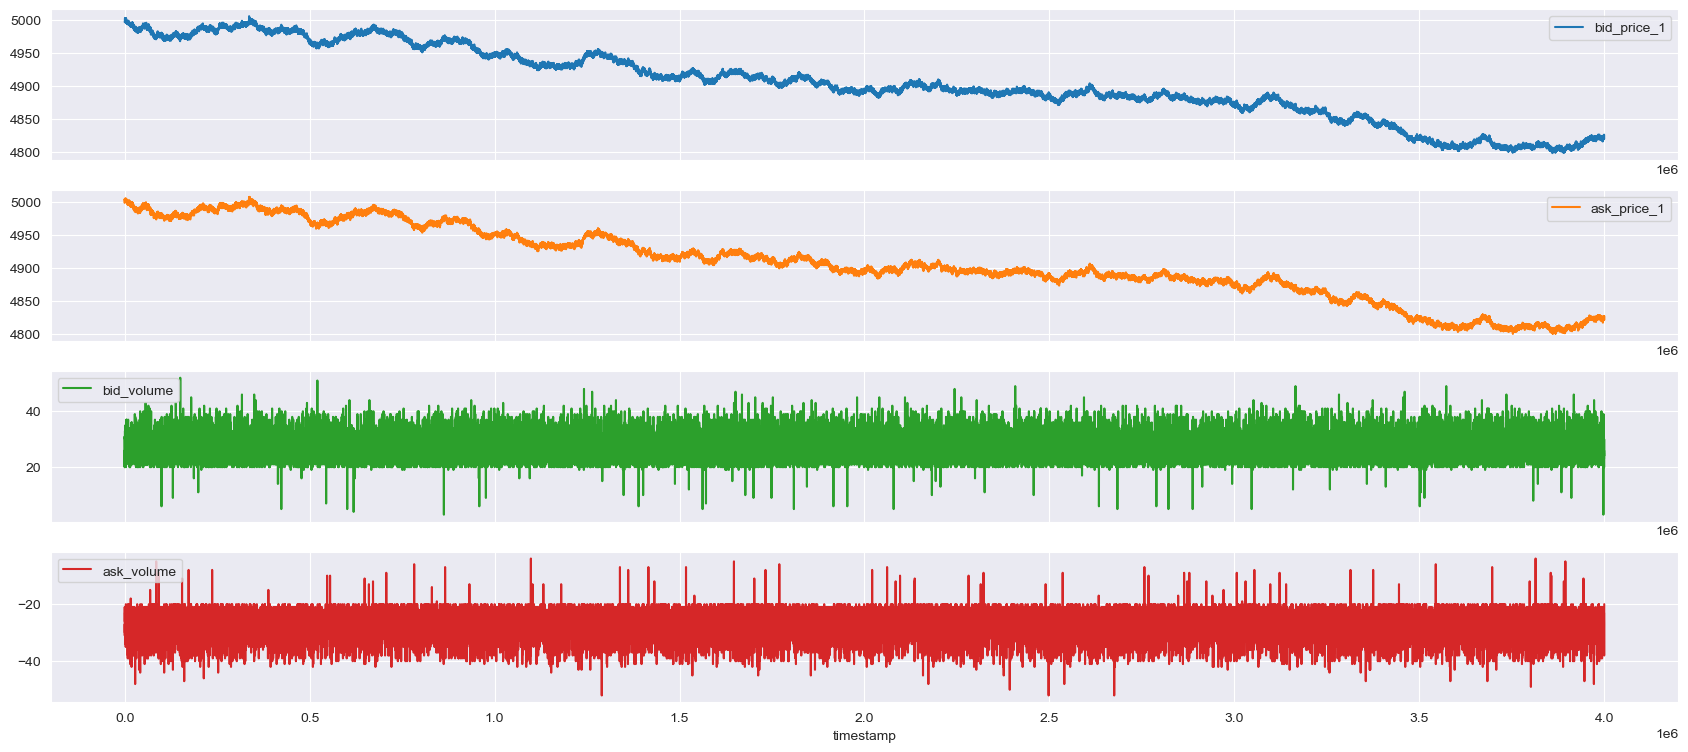

In [15]:

banana_prices_df[["bid_price_1", "ask_price_1", "bid_volume", "ask_volume"]].plot(subplots=True)